In [207]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

%matplotlib inline               

pykat.init_pykat_plotting(dpi=200)

UsageError: unrecognized arguments: 


In [208]:
basecode = """

#input laser
l L0 1 0 n0



const l 9                   #cavity length
const fin 30                #change finesse from here
const pi 3.14159265359      #pi

#calculate R of ITM and ETM
func rel=(2*($fin)^2+ ($pi)^2 - ($pi)*(4*($fin)^2+($pi)^2)^0.5)/(2*($fin)^2) 


#HG modes
tem L0 0 0 1 0 
tem L0 1 0 1 0 
tem L0 2 0 1 0 
tem L0 3 0 1 0 
tem L0 4 0 1 0 
tem L0 5 0 1 0 
tem L0 6 0 1 0 
tem L0 7 0 1 0 
tem L0 8 0 1 0 
tem L0 9 0 1 0
tem L0 10 0 1 0 

#cavity
s s0 1 n0 nITM1
m2 ITM 0.1 0 0 nITM1 nITM2
s scav $l nITM2 nETM1
m2 ETM 0.1 0 0 nETM1 nETM2

#mirror Roc
attr ITM Rc 0
attr ETM Rcx 10
attr ETM Rcy 10

cav FP ITM nITM2 ETM nETM1



#plot g vs order
xaxis ETM Rcx lin 10 700 8000
func g = 1-($l/$x1)


put ETM Rcy $x1
put ETM R $rel
put ITM R $rel

#ad detectors
ad order0 0 0 0 nETM2
ad order1 1 0 0 nETM2
ad order2 2 0 0 nETM2
ad order3 3 0 0 nETM2
ad order4 4 0 0 nETM2
ad order5 5 0 0 nETM2
ad order6 6 0 0 nETM2
ad order7 7 0 0 nETM2
ad order8 8 0 0 nETM2
ad order9 9 0 0 nETM2
ad order10 10 0 0 nETM2

cp FP x finesse


maxtem 10
phase 2

#noplot Rc2

"""

In [209]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(basecode)

out = basekat.run()
out.info()
#out.plot()

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 4 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 5 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 6 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 7 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 8 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 9 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 10 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
R

100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 137.279 seconds

--- Output info ---

Run date and time: 2021-06-22 22:12:24.491161
Detectors used: FP_x_finesse, g, order0, order1, order10, order2, order3, order4, order5, order6, order7, order8, order9, rel

One xaxis used: ['xaxis ETM Rcx lin 10 700 8000', 'put ETM Rcy $x1']
order0       : min = 2.730528898609770e+00 max = 2.730528898609770e+00
order1       : min = 1.504747678453500e-01 max = 1.144725090188250e+00
order2       : min = 1.427746794384550e-01 max = 6.180624696672550e-01
order3       : min = 1.427746424251980e-01 max = 2.724360683256840e+00
order4       : min = 1.427745966529350e-01 max = 2.727763442274680e+00
order5       : min = 1.427745819835630e-01 max = 2.730398237440230e+00
order6       : min = 1.427745813391650e-01 max = 2.728796512117340e+00
order7       : min = 1.427745823621940e-01 max = 2.729972518288890e+00
order8       : min = 1.427745809634660e-01 max = 2.730075680180630e+00

Text(0, 0.5, 'HG modes intensity(rel to fund. mode)')

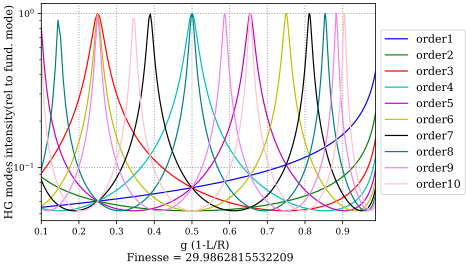

In [221]:

y=[]
x= out['g']
colors = ['b','g','r','c','m','y','k','teal','violet','pink','olive']
plt.figure(figsize=(6,4))


#append all output detectors in an array
for i in range(0,10,1):
    y.append(out['order'+str(i+1)]/out['order0'])


#plot all outputs
for k in range(0,10,1):
    plt.semilogy(x,y[k],antialiased=False,label='order'+str(k),c=colors[k])  
    
  
#label and other stuff
plt.grid(linewidth=1)
plt.legend(["order1","order2","order3","order4","order5","order6","order7","order8","order9","order10"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("g (1-L/R)  \n Finesse = "+str(out['FP_x_finesse'][1]))
plt.ylabel("HG modes intensity(rel to fund. mode)",verticalalignment='center')